In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [2]:
data = pd.read_csv('Custom_CNN_Features.csv')

In [3]:
data_info = data.info()
data_info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3253 entries, 0 to 3252
Columns: 202 entries, Filename to f199
dtypes: float64(174), int64(27), object(1)
memory usage: 5.0+ MB


In [4]:
def common_clean(data):
    """Common process for data cleaning 
    
    Args:
        data: the pandas dataframe
    Returns:
        a clean dataframe without missing values and duplicates
    """
    # fill in missing values
    data = data.fillna(0)
    # remove white spaces from field names
    data.columns = data.columns.str.strip()
    # remove duplicates
    data = data.drop_duplicates()
    return data

In [5]:
data

,Filename,Class Label,f0,f1,f2,f3,f4,f5,f6,f7,...,f190,f191,f192,f193,f194,f195,f196,f197,f198,f199
0,1.png,2,50.557468,0.0,0.0,0.0,0.0,0.0,0.000000,0,...,316.271667,0.0,239.577011,277.834534,205.776398,0.0,0.0,0.0,0.0,91.438698
1,10.jpg.png,2,125.256027,0.0,0.0,0.0,0.0,0.0,48.989120,0,...,1317.333740,0.0,1000.075012,1118.496948,1030.366699,0.0,0.0,0.0,0.0,297.483124
2,10.png,2,50.160606,0.0,0.0,0.0,0.0,0.0,0.000000,0,...,330.470978,0.0,251.886398,288.062134,220.889481,0.0,0.0,0.0,0.0,93.795654
3,100.png,2,63.720730,0.0,0.0,0.0,0.0,0.0,0.000000,0,...,442.839233,0.0,345.145599,389.100678,304.433990,0.0,0.0,0.0,0.0,117.381721
4,10091.jpg,2,64.484604,0.0,0.0,0.0,0.0,0.0,37.368713,0,...,835.147400,0.0,649.643616,693.101868,690.640564,0.0,0.0,0.0,0.0,159.916016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3248,patch_84.jpg.png,2,283.005707,0.0,0.0,0.0,0.0,0.0,73.068192,0,...,2643.636230,0.0,2036.106934,2269.582275,1973.414917,0.0,0.0,0.0,0.0,657.907715
3249,patch_85.jpg.png,2,609.193603,0.0,0.0,0.0,0.0,0.0,131.018112,0,...,5950.206055,0.0,4727.840820,5170.731934,4594.757324,0.0,0.0,0.0,0.0,1362.733398
3250,patch_86.jpg.png,2,781.789490,0.0,0.0,0.0,0.0,0.0,174.997360,0,...,7535.423828,0.0,5972.883789,6563.629883,5749.376465,0.0,0.0,0.0,0.0,1758.735840
3251,patch_87.jpg.png,2,688.966675,0.0,0.0,0.0,0.0,0.0,206.603851,0,...,7119.000977,0.0,5575.274414,6160.208984,5423.260742,0.0,0.0,0.0,0.0,1670.340088


In [6]:
data = common_clean(data)

In [7]:
data

,Filename,Class Label,f0,f1,f2,f3,f4,f5,f6,f7,...,f190,f191,f192,f193,f194,f195,f196,f197,f198,f199
0,1.png,2,50.557468,0.0,0.0,0.0,0.0,0.0,0.000000,0,...,316.271667,0.0,239.577011,277.834534,205.776398,0.0,0.0,0.0,0.0,91.438698
1,10.jpg.png,2,125.256027,0.0,0.0,0.0,0.0,0.0,48.989120,0,...,1317.333740,0.0,1000.075012,1118.496948,1030.366699,0.0,0.0,0.0,0.0,297.483124
2,10.png,2,50.160606,0.0,0.0,0.0,0.0,0.0,0.000000,0,...,330.470978,0.0,251.886398,288.062134,220.889481,0.0,0.0,0.0,0.0,93.795654
3,100.png,2,63.720730,0.0,0.0,0.0,0.0,0.0,0.000000,0,...,442.839233,0.0,345.145599,389.100678,304.433990,0.0,0.0,0.0,0.0,117.381721
4,10091.jpg,2,64.484604,0.0,0.0,0.0,0.0,0.0,37.368713,0,...,835.147400,0.0,649.643616,693.101868,690.640564,0.0,0.0,0.0,0.0,159.916016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3248,patch_84.jpg.png,2,283.005707,0.0,0.0,0.0,0.0,0.0,73.068192,0,...,2643.636230,0.0,2036.106934,2269.582275,1973.414917,0.0,0.0,0.0,0.0,657.907715
3249,patch_85.jpg.png,2,609.193603,0.0,0.0,0.0,0.0,0.0,131.018112,0,...,5950.206055,0.0,4727.840820,5170.731934,4594.757324,0.0,0.0,0.0,0.0,1362.733398
3250,patch_86.jpg.png,2,781.789490,0.0,0.0,0.0,0.0,0.0,174.997360,0,...,7535.423828,0.0,5972.883789,6563.629883,5749.376465,0.0,0.0,0.0,0.0,1758.735840
3251,patch_87.jpg.png,2,688.966675,0.0,0.0,0.0,0.0,0.0,206.603851,0,...,7119.000977,0.0,5575.274414,6160.208984,5423.260742,0.0,0.0,0.0,0.0,1670.340088


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3253 entries, 0 to 3252
Columns: 202 entries, Filename to f199
dtypes: float64(174), int64(27), object(1)
memory usage: 5.0+ MB


In [9]:
missing_values = data.isnull().sum()

In [10]:
missing_values

Filename       0
Class Label    0
f0             0
f1             0
f2             0
              ..
f195           0
f196           0
f197           0
f198           0
f199           0
Length: 202, dtype: int64

In [12]:
class_balance = data['Class Label'].value_counts()

In [14]:
class_balance

Class Label
1    1634
0    1055
2     564
Name: count, dtype: int64

In [27]:
numeric_data = data.drop(columns=['Filename', 'Class Label'])

In [28]:
threshold = len(numeric_data) / 2
sparse_cols = numeric_data.columns[(numeric_data == 0).sum() > threshold]
numeric_data = numeric_data.drop(columns=sparse_cols)

In [29]:
data_ranges = numeric_data.describe().T[['min', 'max']]

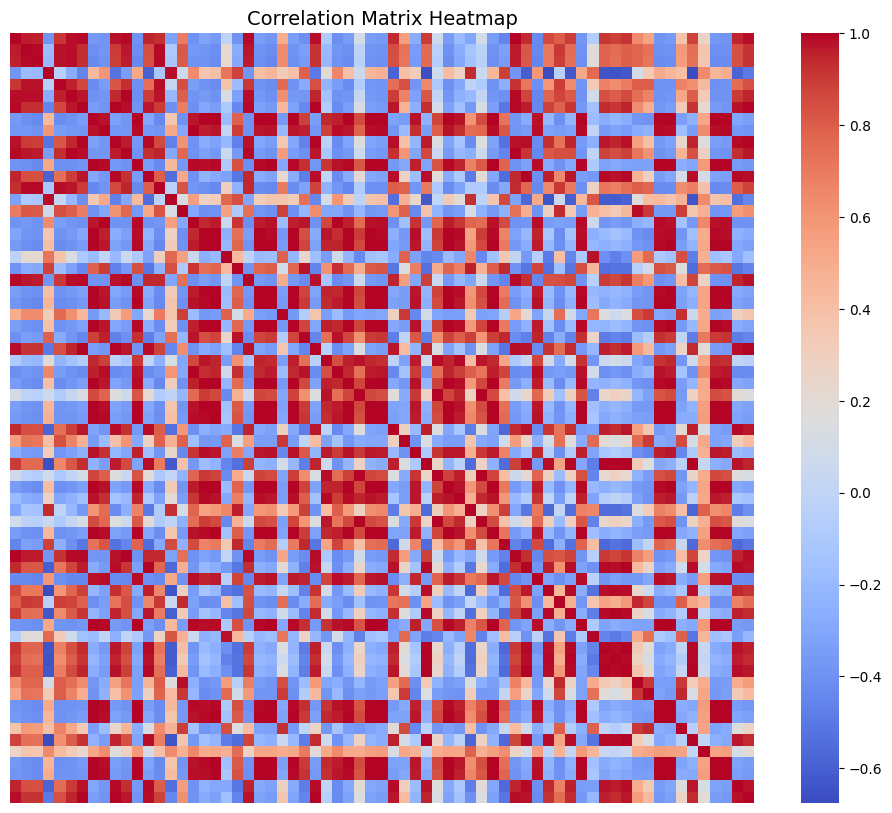

In [30]:
correlation_matrix = numeric_data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', cbar=True, xticklabels=False, yticklabels=False)
plt.title('Correlation Matrix Heatmap', fontsize=14)
plt.show()

In [31]:
matrix_rank = np.linalg.matrix_rank(numeric_data.values)

In [32]:
min_max_scaler = MinMaxScaler()
normalized_data_minmax = pd.DataFrame(min_max_scaler.fit_transform(numeric_data), columns=numeric_data.columns)
normalized_data_minmax['Filename'] = data['Filename']
normalized_data_minmax['Class Label'] = data['Class Label']

# Standardization (Z-score)
standard_scaler = StandardScaler()
standardized_data = pd.DataFrame(standard_scaler.fit_transform(numeric_data), columns=numeric_data.columns)
standardized_data['Filename'] = data['Filename']
standardized_data['Class Label'] = data['Class Label']

In [33]:
print("Data Types:", data_info)
print("Missing Values:", missing_values)
print("Class Balance:", class_balance)
print("Data Ranges:", data_ranges)
print("Matrix Rank:", matrix_rank)

Data Types: None
Missing Values: Filename       0
Class Label    0
f0             0
f1             0
f2             0
              ..
f195           0
f196           0
f197           0
f198           0
f199           0
Length: 202, dtype: int64
Class Balance: Class Label
1    1634
0    1055
2     564
Name: count, dtype: int64
Data Ranges:            min          max
f2    0.000000   536.879639
f3    0.000000   760.753845
f5    0.000000   587.289551
f11   0.000000   490.775055
f13   0.000000   824.327576
...        ...          ...
f189  1.978668  1118.583252
f192  0.000000  5972.883789
f194  0.000000  5749.376465
f195  0.000000   750.316284
f196  0.000000   571.680176

[67 rows x 2 columns]
Matrix Rank: 67


In [35]:
normalized_data_minmax.to_csv('normalized_minmax.csv', index=False)
standardized_data.to_csv('standardized.csv', index=False)

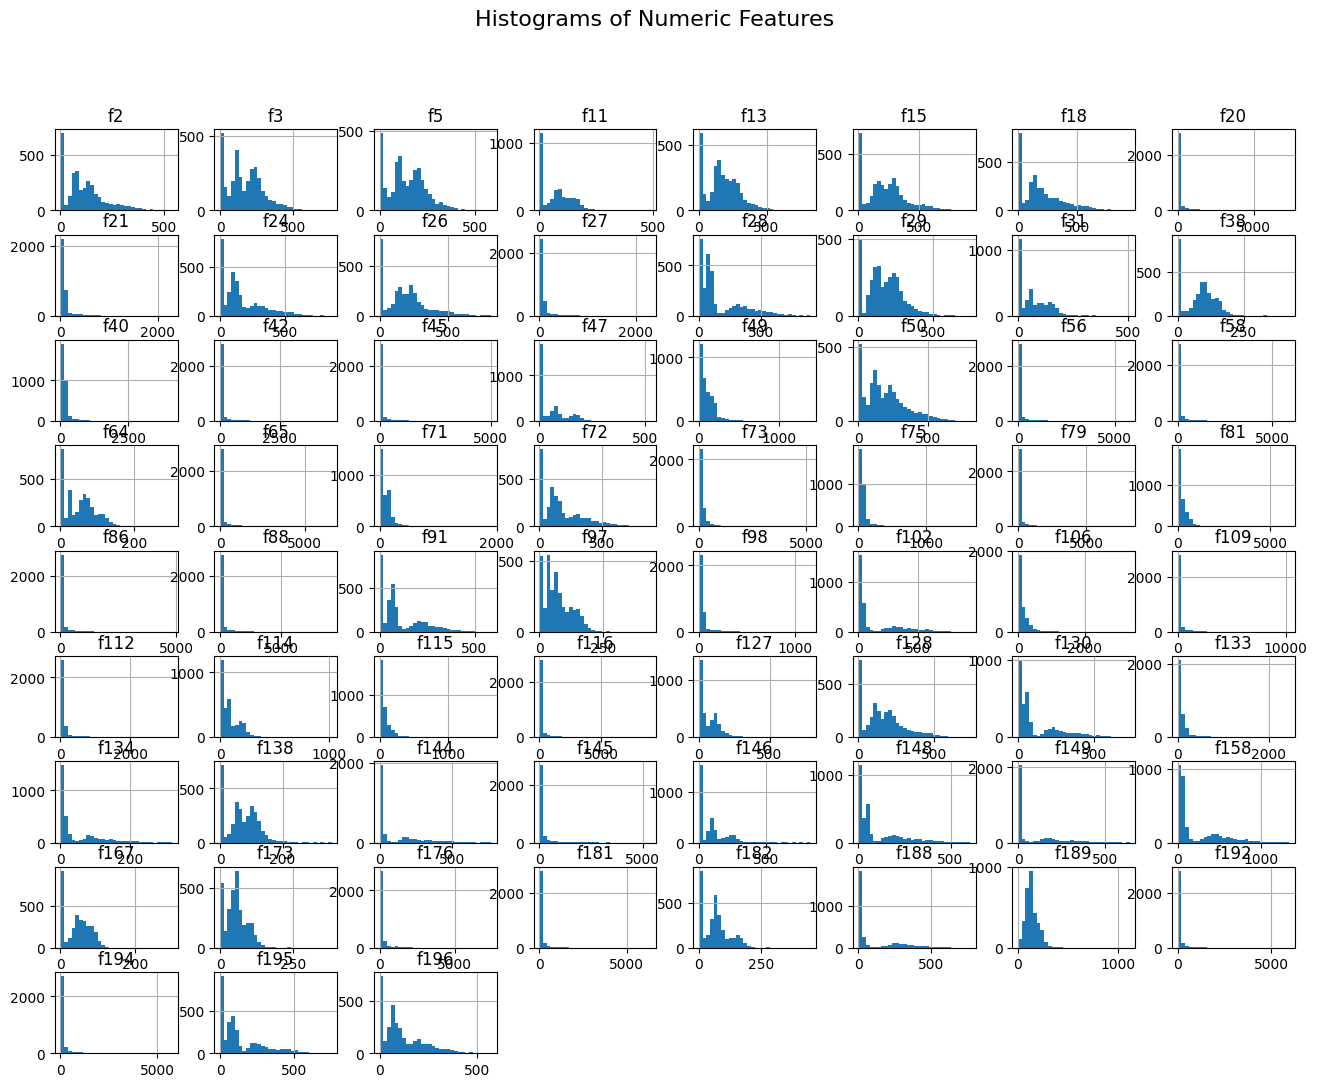

In [36]:
numeric_data.hist(figsize=(16, 12), bins=30)
plt.suptitle("Histograms of Numeric Features", fontsize=16)
plt.show()

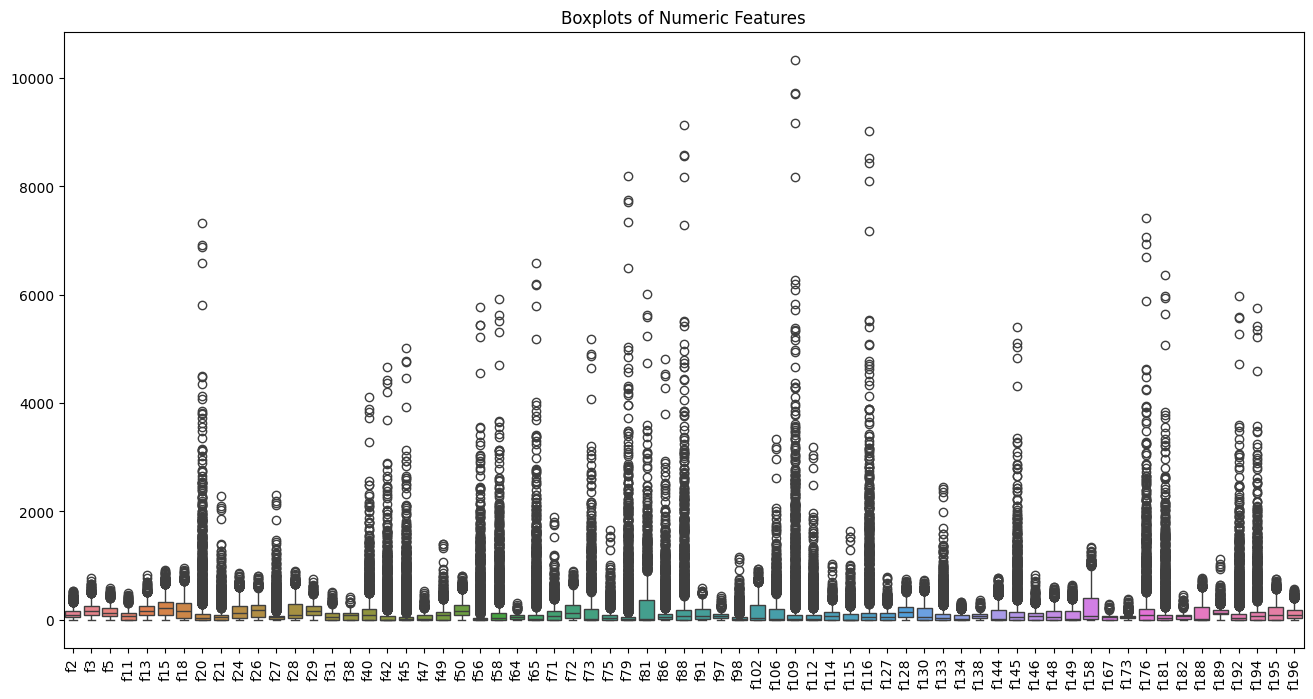

In [37]:
plt.figure(figsize=(16, 8))
sns.boxplot(data=numeric_data)
plt.xticks(rotation=90)
plt.title("Boxplots of Numeric Features")
plt.show()

In [38]:
feature_variances = numeric_data.var()
low_variance_features = feature_variances[feature_variances < 1e-4]
print("Low-variance features:", low_variance_features)

Low-variance features: Series([], dtype: float64)


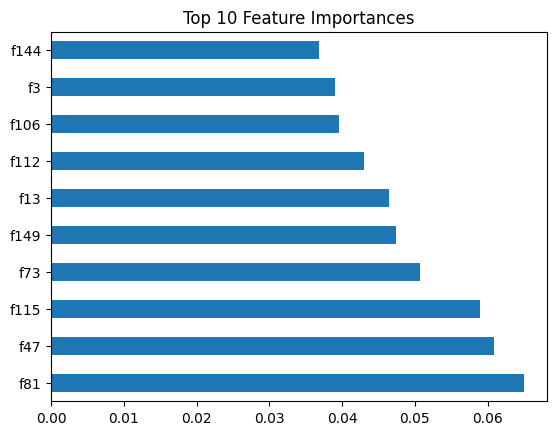

In [39]:
from sklearn.ensemble import RandomForestClassifier

X = numeric_data
y = data['Class Label']
model = RandomForestClassifier(random_state=42)
model.fit(X, y)
feature_importance = pd.Series(model.feature_importances_, index=numeric_data.columns)
feature_importance.nlargest(10).plot(kind='barh')
plt.title("Top 10 Feature Importances")
plt.show()


In [41]:
for col in data.select_dtypes(include=['object']):
    if col not in ['Filename', 'Class Label']:
        data[col].value_counts().plot(kind='bar')
        plt.title(f"Distribution of {col}")
        plt.show()

In [42]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(numeric_data, data['Class Label'])
print("Resampled class distribution:\n", pd.Series(y_resampled).value_counts())

Resampled class distribution:
 Class Label
2    1634
0    1634
1    1634
Name: count, dtype: int64


In [48]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.multiclass import OneVsRestClassifier

# Load and preprocess the dataset
data = pd.read_csv('standardized.csv')

# Drop unnecessary columns
X = data.drop(columns=['Filename', 'Class Label'])  # Features
y = data['Class Label']  # Target

# Encode target labels if they are categorical
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Normalize the feature data using standard scaling
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Split dataset into training and testing sets (75:25 split)
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.25, random_state=42)

# Initialize classifiers
classifiers = {
    'kNN': KNeighborsClassifier(n_neighbors=5),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Support Vector Machine (SVM)': SVC(kernel='linear', probability=True, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Naive Bayes': GaussianNB()
}

# Prepare a results dictionary
results = []

# Train and evaluate each classifier
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    y_proba = clf.predict_proba(X_test) if hasattr(clf, "predict_proba") else None
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    auroc = roc_auc_score(y_test, y_proba, multi_class='ovr') if y_proba is not None else None
    
    # Append results
    results.append({
        'Classifier': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'AUROC': auroc
    })

# Convert results to a DataFrame for better visualization
results_df = pd.DataFrame(results)
results_df.sort_values(by=['F1-Score'], ascending=False)


,Classifier,Accuracy,Precision,Recall,F1-Score,AUROC
3,Random Forest,0.933661,0.936102,0.933661,0.933695,0.983313
2,Support Vector Machine (SVM),0.932432,0.936454,0.932432,0.932516,0.976171
0,kNN,0.929975,0.932528,0.929975,0.930069,0.969277
4,Naive Bayes,0.918919,0.919466,0.918919,0.918992,0.972200
1,Decision Tree,0.906634,0.907205,0.906634,0.906710,0.926472


In [49]:
from sklearn.metrics import accuracy_score

# Prepare a dictionary to store results
train_results = []

# Train each model and evaluate both training and test metrics
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    
    # Predictions for training set and test set
    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)
    
    # Calculate training and test accuracy
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    
    # Compare the performance
    if train_accuracy > 0.9 and test_accuracy < 0.7:
        fit_type = 'Overfitting'
    elif train_accuracy < 0.7 and test_accuracy < 0.7:
        fit_type = 'Underfitting'
    else:
        fit_type = 'Regular Fit'
    
    # Append the results
    train_results.append({
        'Classifier': name,
        'Train Accuracy': train_accuracy,
        'Test Accuracy': test_accuracy,
        'Fit Type': fit_type
    })

# Convert to DataFrame for better visualization
train_results_df = pd.DataFrame(train_results)
train_results_df.sort_values(by=['Test Accuracy'], ascending=False)


,Classifier,Train Accuracy,Test Accuracy,Fit Type
3,Random Forest,1.000000,0.933661,Regular Fit
2,Support Vector Machine (SVM),0.933169,0.932432,Regular Fit
0,kNN,0.942599,0.929975,Regular Fit
4,Naive Bayes,0.910619,0.918919,Regular Fit
1,Decision Tree,1.000000,0.906634,Regular Fit


In [50]:
import time
from sklearn.metrics import accuracy_score

# Prepare a dictionary to store results
performance_results = []

# Train each model and evaluate training/classification time
for name, clf in classifiers.items():
    # Measure training time
    start_train = time.time()
    clf.fit(X_train, y_train)
    end_train = time.time()
    training_time = end_train - start_train
    
    # Measure classification time for the test set
    start_test = time.time()
    y_test_pred = clf.predict(X_test)
    end_test = time.time()
    classification_time = end_test - start_test
    
    # Calculate test accuracy
    test_accuracy = accuracy_score(y_test, y_test_pred)
    
    # Store the results
    performance_results.append({
        'Classifier': name,
        'Training Time (s)': training_time,
        'Classification Time (s)': classification_time,
        'Test Accuracy': test_accuracy
    })

# Convert results to DataFrame for better visualization
performance_df = pd.DataFrame(performance_results)
performance_df.sort_values(by=['Test Accuracy'], ascending=False)

,Classifier,Training Time (s),Classification Time (s),Test Accuracy
3,Random Forest,3.169341,0.018324,0.933661
2,Support Vector Machine (SVM),0.341169,0.006906,0.932432
0,kNN,0.002017,0.100489,0.929975
4,Naive Bayes,0.004001,0.002008,0.918919
1,Decision Tree,0.323752,0.000000,0.906634
